# ASSIGNMENT 3

### COMPOSITES

Quasi-Biennial_ Oscillation is the osscilation of lower stratospheric wind above the tropics between easterly and westerly with a fairly regular 28 to 29 month cycle. It is when the gravity waves that are propagating vertically causes the stratospheric wind to oscillate.
A lot of studies has been performed studying the response of the Global temperature due to QBO and some teleconnection has explored that it cause the temperature variability specifically the longe range forcasts.Though it is still not clear that how it impact the weather at the surface, studies have shown that it has some infuence upon weather variables.

## Here, I am using the composite analysis to explore the impact of QBO upon global temperature.

In [38]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import pandas as pd

# QBO INDEX 

In [6]:
path='/home/aachar5/'
file='qbo.data'
index_name='qbo'
df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(6).index,inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,-4.44,-5.78,-7.31,-6.70,-5.57,-4.73,-5.51,-7.22,-7.24,-6.07,-6.28,-8.18
1949,-9.77,-11.80,-11.72,-10.69,-9.34,-9.43,-9.07,-9.08,-8.32,-7.01,-6.43,-7.24
1950,-8.99,-11.37,-10.63,-8.19,-6.09,-6.61,-7.11,-6.51,-3.82,-2.39,-2.18,-3.31
1951,-6.01,-5.32,-1.93,0.91,2.26,-0.30,-2.70,-5.31,-5.92,-4.59,-3.65,-3.98
1952,-6.80,-7.71,-6.99,-5.68,-4.76,-6.00,-7.60,-8.15,-5.73,-2.96,-0.51,-1.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,-19.02,-19.37,-19.77,-21.41,-24.23,-28.45,-29.10,-20.41,-9.91,-2.79,3.36,8.05
2019,9.02,9.25,11.82,13.36,14.59,14.36,10.96,9.97,8.25,7.27,5.07,1.66
2020,-2.51,-3.20,-4.36,-5.03,-4.86,-2.78,0.34,4.78,7.95,10.80,11.15,10.37


## Since my temperature data goes from 2001-01-1 to 2021-12-01, I am selecting the same times for the QBO data.

In [40]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[11])+'-01'
print(start_date)
print(end_date)

1948-1-01
2022-12-01


In [41]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', length=900, freq='MS')

In [42]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [43]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='qbo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 900)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-12-01
Data variables:
    qbo      (time) float32 -4.44 -5.78 -7.31 -6.7 ... 9.8 -999.0 -999.0 -999.0

In [44]:
da_index = ds_index.sel(time=slice('2001-01-01','2021-12-01'))
da_index

<xarray.Dataset>
Dimensions:  (time: 252)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2021-12-01
Data variables:
    qbo      (time) float32 -15.69 -15.53 -15.99 -17.73 ... -19.14 -19.78 -21.58

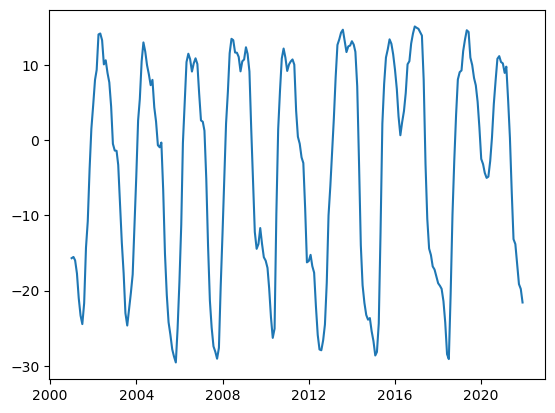

In [45]:
plt.plot(da_index['time'],da_index['qbo']) ;

## Defining Easterly Phase,and westerly Phase of QBO
### The QBO are zonal winds in the stratosphere that typically oscillate between westerly (positive) and easterly (negative) phases, every 12-24 months.

In [18]:
Westerly = da_index['qbo'].where(da_index['qbo']>0) 
Easterly = da_index['qbo'].where(da_index['qbo']<0)
Neutral = da_index['qbo'].where(da_index['qbo'] == 0)

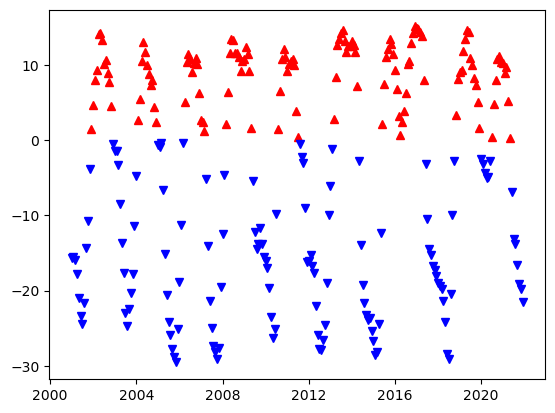

In [19]:
plt.plot(da_index['time'],Westerly,'r^')
plt.plot(da_index['time'],Easterly,'bv')
plt.plot(da_index['time'],Neutral,'go')

## How many months do we have Westerly phase and Easterly phase 

In [22]:
print('QBO_westerly: ',Westerly.count(dim='time').values)
print('QBO_easterly: ',Easterly.count(dim='time').values)

counts=[Westerly.count(dim='time').values,
        Easterly.count(dim='time').values,
       Neutral.count(dim='time').values]
print(counts)

QBO_westerly:  125
QBO_easterly:  127
[array(125), array(127), array(0)]


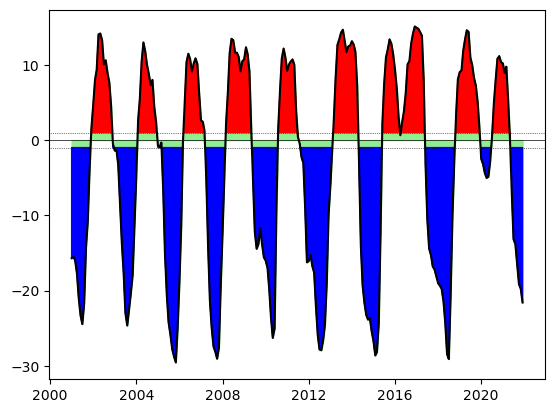

In [25]:
plt.plot(da_index['time'],da_index['qbo'],'k')
plt.fill_between(da_index['time'].values,da_index['qbo'],color='lightgreen')
plt.fill_between(da_index['time'].values,Westerly,y2=1.0,color='red')
plt.fill_between(da_index['time'].values,Easterly,y2=-1.0,color='blue')
plt.fill_between(da_index['time'].values,Neutral,y2=-1.0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;

## Getting the Global monthly averaged temperature data from ERA5

In [26]:
path = '/scratch/aachar5/clim680_dataset/'
fname = 'adaptor.mars.internal-1663965452.3528512-14052-2-b47b40ba-074e-4000-baa7-e70764531a59.nc'
ds_temp = xr.open_dataset(path+fname)
ds_temp

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 264)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-23 20:37:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [53]:
ds_temp['t'].min()

<xarray.DataArray 't' ()>
array(225.23069763)

In [28]:
da_temp = ds_temp.t.sel(time=slice(da_index['time'][0],da_index['time'][-1]))
da_temp

<xarray.DataArray 't' (time: 252, latitude: 721, longitude: 1440)>
[261636480 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2021-12-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

## Grouping them by month and making anomalies of our Temperature data

In [46]:
da_climo = da_temp.groupby('time.month').mean()
da_anoms = da_temp.groupby('time.month')-da_climo
da_anoms

<xarray.DataArray 't' (time: 252, latitude: 721, longitude: 1440)>
array([[[-9.52102661e-01, -9.52102661e-01, -9.52102661e-01, ...,
         -9.52102661e-01, -9.52102661e-01, -9.52102661e-01],
        [-1.06889343e+00, -1.06884766e+00, -1.06938171e+00, ...,
         -1.06854248e+00, -1.06828308e+00, -1.06945801e+00],
        [-1.18504333e+00, -1.18559265e+00, -1.18598938e+00, ...,
         -1.18377686e+00, -1.18417358e+00, -1.18594360e+00],
        ...,
        [-1.13262939e+00, -1.13369751e+00, -1.13302612e+00, ...,
         -1.13140869e+00, -1.13079834e+00, -1.13198853e+00],
        [-1.22506714e+00, -1.22552490e+00, -1.22570801e+00, ...,
         -1.22387695e+00, -1.22415161e+00, -1.22601318e+00],
        [-1.27795410e+00, -1.27795410e+00, -1.27795410e+00, ...,
         -1.27795410e+00, -1.27795410e+00, -1.27795410e+00]],

       [[ 8.38531494e-01,  8.38531494e-01,  8.38531494e-01, ...,
          8.38531494e-01,  8.38531494e-01,  8.38531494e-01],
        [ 8.72177124e-01,  8.71505737e-01,  8.70635986e-01, ...,
          8.73321533e-01,  8.73764038e-01,  8.71536255e-01],
        [ 9.04693604e-01,  9.04815674e-01,  9.04632568e-01, ...,
          9.07669067e-01,  9.06265259e-01,  9.06066895e-01],
...
         -2.20245361e-01, -2.21954346e-01, -2.23266602e-01],
        [-3.38592529e-01, -3.38714600e-01, -3.40332031e-01, ...,
         -3.37005615e-01, -3.37188721e-01, -3.38775635e-01],
        [-3.55499268e-01, -3.55499268e-01, -3.55499268e-01, ...,
         -3.55499268e-01, -3.55499268e-01, -3.55499268e-01]],

       [[-9.77401733e-01, -9.77401733e-01, -9.77401733e-01, ...,
         -9.77401733e-01, -9.77401733e-01, -9.77401733e-01],
        [-1.17773438e+00, -1.17745972e+00, -1.17712402e+00, ...,
         -1.17826843e+00, -1.17826843e+00, -1.17779541e+00],
        [-1.30567932e+00, -1.30502319e+00, -1.30441284e+00, ...,
         -1.30799866e+00, -1.30711365e+00, -1.30642700e+00],
        ...,
        [ 1.59841919e+00,  1.59701538e+00,  1.59841919e+00, ...,
          1.59674072e+00,  1.59866333e+00,  1.59829712e+00],
        [ 1.77267456e+00,  1.77038574e+00,  1.77093506e+00, ...,
          1.77160645e+00,  1.77249146e+00,  1.77178955e+00],
        [ 1.81137085e+00,  1.81137085e+00,  1.81137085e+00, ...,
          1.81137085e+00,  1.81137085e+00,  1.81137085e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2021-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

## Selecting the dates that matches with Easterly, Westerly phase of QBO

In [36]:
Westerly_temp = da_anoms.sel(time=Westerly.dropna(dim='time')['time']).mean(dim='time')
Easterly_temp = da_anoms.sel(time=Easterly.dropna(dim='time')['time']).mean(dim='time')

comp_temp = [Westerly_temp,Easterly_temp]
comp_temp

[<xarray.DataArray 't' (latitude: 721, longitude: 1440)>
 array([[0.02393237, 0.02393237, 0.02393237, ..., 0.02393237, 0.02393237,
         0.02393237],
        [0.02248877, 0.02240771, 0.0224165 , ..., 0.02251929, 0.02244092,
         0.02248706],
        [0.02214331, 0.02208044, 0.02200464, ..., 0.02237573, 0.02224744,
         0.02219714],
        ...,
        [0.06754199, 0.06766833, 0.0677622 , ..., 0.06717236, 0.06722583,
         0.06749341],
        [0.06780237, 0.06789111, 0.06795105, ..., 0.06760877, 0.06763818,
         0.06765772],
        [0.06662805, 0.06662805, 0.06662805, ..., 0.06662805, 0.06662805,
         0.06662805]], dtype=float32)
 Coordinates:
   * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
   * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0,
 <xarray.DataArray 't' (latitude: 721, longitude: 1440)>
 array([[-0.02357351, -0.02357351, -0.02357351, ..., -0.02357351,
         -0.02357351, -0.02357351],
     

# Composite

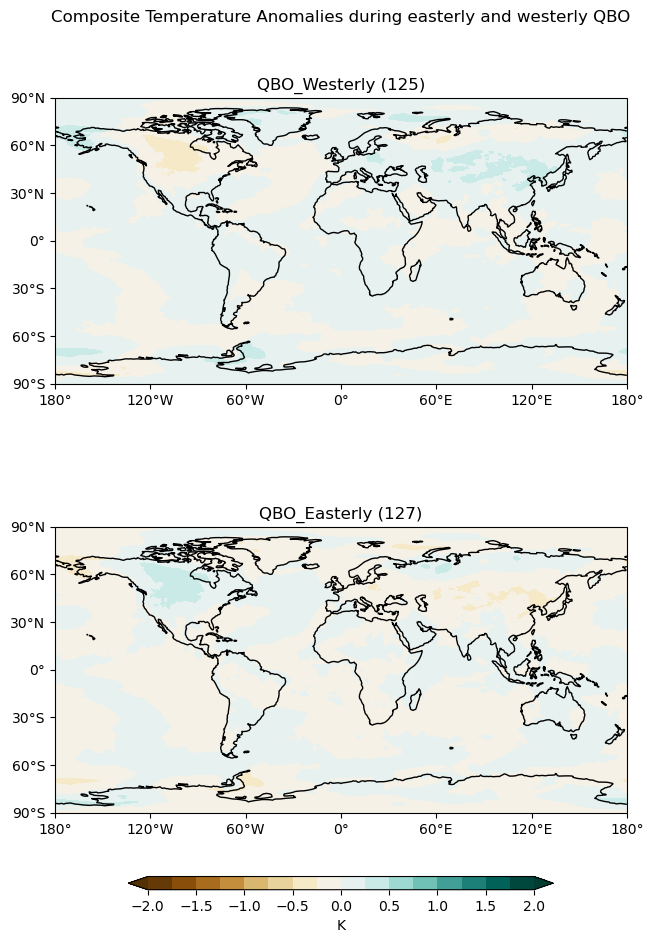

In [70]:
labels=['QBO_Westerly','QBO_Easterly']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,qbo in enumerate(comp_temp):

        # Select the season
        data = comp_temp[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_temp[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_temp[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('Composite Temperature Anomalies during easterly and westerly QBO') ;